# Multi-label Classification

## Import Packages

In [1]:
from IPython.display import display, HTML, Image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import random

from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import make_scorer
from sklearn import metrics

# to avoid future warnings for sklearn
import warnings
warnings.filterwarnings("ignore")

## Task 0: Load the Yeast Dataset

In [2]:
# Read the CSV file
dataset = pd.read_csv('data/yeast.csv')
print("Dataset.shape: " + str(dataset.shape))

# split the features-X and class labels-y
X = dataset.iloc[:, :103]
y = dataset.iloc[:, 103:]

print("X.shape: " + str(X.shape))
display(X.head())
print("y.shape: " + str(y.shape))
display(y.head())
print("Descriptive stats:")
X.describe()

Dataset.shape: (2417, 117)
X.shape: (2417, 103)


,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.041850,0.066938,-0.056617,...,0.006166,-0.012976,-0.014259,-0.015024,-0.010747,0.000411,-0.032056,-0.018312,0.030126,0.124722
1,-0.103956,0.011879,-0.098986,-0.054501,-0.007970,0.049113,-0.030580,-0.077933,-0.080529,-0.016267,...,0.007680,0.027719,-0.085811,0.111123,0.050541,0.027565,-0.063569,-0.041471,-0.079758,0.017161
2,0.509949,0.401709,0.293799,0.087714,0.011686,-0.006411,-0.006255,0.013646,-0.040666,-0.024447,...,0.096277,-0.044932,-0.089470,-0.009162,-0.012010,0.308378,-0.028053,0.026710,-0.066565,-0.122352
3,0.119092,0.004412,-0.002262,0.072254,0.044512,-0.051467,0.074686,-0.007670,0.079438,0.062184,...,-0.083809,0.200354,-0.075716,0.196605,0.152758,-0.028484,-0.074207,-0.089227,-0.049913,-0.043893
4,0.042037,0.007054,-0.069483,0.081015,-0.048207,0.089446,-0.004947,0.064456,-0.133387,0.068878,...,-0.060467,0.044351,-0.057209,0.028047,0.029661,-0.050026,0.023248,-0.061539,-0.035160,0.067834


y.shape: (2417, 14)


,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0,0,0,0,0,0,1,1,0,0,0,1,1,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,1,1,0
3,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,1,0,0,0,0,0,0,0,0


Descriptive stats:


,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103
count,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,...,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000
mean,0.001173,-0.000436,-0.000257,0.000265,0.001228,0.000475,0.001107,0.000420,0.001076,-0.000009,...,-0.000773,0.000464,-0.000515,0.000667,0.000324,-0.001483,-0.001047,-0.001539,0.000284,0.007605
std,0.097411,0.097885,0.097746,0.096969,0.096909,0.097306,0.097170,0.096803,0.096326,0.096805,...,0.093316,0.096684,0.096209,0.096635,0.096280,0.094369,0.096900,0.094211,0.093154,0.099368
min,-0.371146,-0.472632,-0.339195,-0.467945,-0.367044,-0.509447,-0.319928,-0.594498,-0.369712,-0.767128,...,-0.455191,-0.283594,-0.279408,-0.226420,-0.225374,-0.501572,-0.236589,-0.267052,-0.194079,-0.237752
25%,-0.053655,-0.058734,-0.057526,-0.057149,-0.058461,-0.060212,-0.058445,-0.062849,-0.063472,-0.065010,...,-0.054133,-0.056415,-0.056414,-0.059382,-0.058025,-0.053591,-0.063318,-0.059542,-0.054078,-0.077191
50%,0.003649,-0.003513,0.002892,-0.000153,0.005565,0.000321,0.006179,0.001436,0.003515,0.002432,...,-0.012893,-0.023595,-0.024313,-0.023059,-0.021942,-0.018216,-0.033623,-0.023519,-0.012007,0.022126
75%,0.057299,0.048047,0.061007,0.054522,0.066286,0.059908,0.068892,0.061418,0.064958,0.063096,...,0.027977,0.034937,0.036057,0.041430,0.035730,0.019583,0.038901,0.025408,0.028087,0.103185
max,0.520272,0.614114,0.353241,0.568960,0.307649,0.336971,0.351401,0.454591,0.419852,0.420876,...,0.609175,0.542867,0.547134,0.385928,0.540493,0.569250,0.509963,0.587358,0.700340,0.163431


### Split into Train and Test Set

In [163]:
# Normalise the data
X = (X-X.min())/(X.max()-X.min())

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)

print("X_train.shape: " + str(X_train.shape))
print("X_test.shape: " + str(X_test.shape))
print("y_train.shape: " + str(y_train.shape))
print("y_test.shape: " + str(y_test.shape))

X_train.shape: (1691, 103)
X_test.shape: (726, 103)
y_train.shape: (1691, 14)
y_test.shape: (726, 14)


## Task 1: Implement the Binary Relevance Algorithm

In [164]:
class BinaryRelevanceClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_classifier=LogisticRegression()):
        self.base_classifier=base_classifier

    def fit(self, X, y):
        """Build a Binary Relevance classifier from the training set (X, y).
        Parameters
        ----------
        X : array-like or sparse matrix, shape = [n_samples, n_features]
            The training input samples. Internally, it will be converted to
            ``dtype=np.float32`` and if a sparse matrix is provided
            to a sparse ``csc_matrix``.
        y : array-like, shape = [n_samples, n_labels] 
            The target values (class labels) as integers or strings.
        """

        # list of individual classifiers
        self.models = []
       
        # for every class label
        for label in list(y.columns):
            # Check that X and y have correct shape
            x_checked, y_checked = check_X_y(X, y[label])
            # every classifier is independent of the others
            # hence we create a copy of the base classifier instance
            base_model = clone(self.base_classifier)
            # fit the base model - one model each for Y1, Y2....Y14
            basel_model = base_model.fit(x_checked, y_checked)
            # add the fitted model list of individual classifiers
            self.models.append(base_model)

    # The predict function to make a set of predictions for a set of query instances
    def predict(self, X):
        # check if the models list has been set up
        check_is_fitted(self, ['models'])
        X = check_array(X)
        
        all_preds = pd.DataFrame()
        i=0
        # list of individual classifier predictions
        preds = []
        
        # predict against each fitted model - one model per label
        for model in self.models:
            pred = model.predict(X)
            # add the prediction to the dataframe
            preds.append(pd.DataFrame({'Class'+ str(i+1): pred}))
            i+=1
        
        # dataframe with predictions for all class labels
        all_preds = pd.concat(preds, axis=1)
        # standard sklearn classifiers return predictions as numpy arrays
        # hence convert the dataframe to a numpy array
        return all_preds.to_numpy()
    


    def predict_proba(self,X):
        # check if the models list has been set up
        check_is_fitted(self, ['models'])
        X = check_array(X)
        
        all_preds = pd.DataFrame()
        i = 0
        
        for model in self.models:
            # Call predict_proba of the each base model
            pred = model.predict_proba(X)
            # Add the probabilities of 1 to the dataframe
            all_preds['Class'+str(i+1)] = [one_prob[1] for one_prob in pred]
            i+=1
        
        #return probabilities
        return all_preds.to_numpy()

### Predictions against the test data

In [165]:
# instantiate the classifier
br_clf = BinaryRelevanceClassifier(LogisticRegression())
# fit
br_clf.fit(X_train, y_train)
# predict
y_pred = br_clf.predict(X_test)
print("y_pred.shape: " + str(y_pred.shape))

y_pred.shape: (726, 14)


### Custom Accuracy Measure for Classifiers

The Accuracy measure used here has been described in - "A Literature Survey on Algorithms for Multi-label Learning" by "Mohammad S Sorower".

In [166]:
def accuracy_score(y_test, y_pred):
    # y_pred is a numpy array, y_test is a dataframe
    # to compare the two, convert to a single type
    y_test = y_test.to_numpy()
    
    # shape of test and preds must be equal
    assert y_test.shape == y_pred.shape
    i=0
    # list of scores for each training sample
    scores = []
    
    # for each test sample
    while i < len(y_test):
        count=0
        # count the number of matches in the sample
        # y_test[i] -> row values in test set (true values)
        # y_pred[i] -> row values in predictions set (predicted values)
        for p, q in zip(y_test[i], y_pred[i]):
            if p == q:
                count += 1

        # accuracy score for the sample = no. of correctly predicted labels/total no. of labels
        scores.append(count / y_pred.shape[1])
        i+=1 

    # final accuracy = avg. accuracy over all test samples =
    # sum of the accuracy of all training samples/no. of training samples
    return round((sum(scores)/len(y_test)), 5)

In [167]:
print("Accuracy of Binary Relevance Classifier: " + str(accuracy_score(y_test, y_pred)))

Accuracy of Binary Relevance Classifier: 0.79073


### Experiment with different Base Classifiers - GridSearch

In [168]:
cv_folds=5

# Set up the parameter grid to search
param_grid ={'base_classifier': [DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2),
                                 RandomForestClassifier(criterion='entropy'),
                                 LogisticRegression(max_iter=20000), GaussianNB(), KNeighborsClassifier(), SVC()] }

# Perform the search
# Using the custom accuracy function defined earlier
tuned_model = GridSearchCV(BinaryRelevanceClassifier(), \
                            param_grid, scoring=make_scorer(accuracy_score), verbose = 2, n_jobs = -1, cv=cv_folds)
tuned_model.fit(X_train, y_train)

# Print details of the best model
print("Best Parameters Found: ")
display(tuned_model.best_params_)
display(tuned_model.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   31.5s finished


Best Parameters Found: 


{'base_classifier': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=20000,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False)}

0.799951691306919

### Evaluate the best model against the Test Data

In [169]:
# instantiate the classifier
br_clf = BinaryRelevanceClassifier(LogisticRegression(max_iter=20000))
# fit
br_clf.fit(X_train, y_train)
# predict
y_pred = br_clf.predict(X_test)
print("y_pred.shape: " + str(y_pred.shape))

y_pred.shape: (726, 14)


In [170]:
print("Accuracy of Binary Relevance Classifier - Best Model: " + str(accuracy_score(y_test, y_pred)))

Accuracy of Binary Relevance Classifier - Best Model: 0.79073


## Task 2: Implement the Binary Relevance Algorithm with Under-Sampling

In [171]:
class BinaryRelevanceClassifierUS(BaseEstimator, ClassifierMixin):
    def __init__(self, base_classifier=LogisticRegression(max_iter=20000)):
        self.base_classifier=base_classifier

    def fit(self, X, y):
        """Build a Binary Relevance classifier with Under sampling from the training set (X, y).
        Parameters
        ----------
        X : array-like or sparse matrix, shape = [n_samples, n_features]
            The training input samples. Internally, it will be converted to
            ``dtype=np.float32`` and if a sparse matrix is provided
            to a sparse ``csc_matrix``.
        y : array-like, shape = [n_samples] 
            The target values (class labels) as integers or strings.
        """

        # list of individual classifiers
        self.models = []
        
        # for each class label
        for label in list(y.columns):
            
            X_cp = X.copy()
            # pick the column values for the label
            y_cp = y[label]
            
            # sampling is done on both X and y, hence join the two dataframes
            X_y_data = pd.concat([X_cp, y_cp], axis=1)
            
            # counters for 0 values and 1 values
            n_val0, n_val1 = 0,0
            
            j=0
            # for each sample
            while j<len(X_y_data):
                # if value for the label is 0
                if(X_y_data.iloc[j][label] == 0):
                    n_val0+=1
                else:
                    # value 1
                    n_val1+=1
                j+=1
            
            # under sample the majority class
            # randomly pick samples from majority class equal to the number of samples in the minority class
            # both the classes will have the same number of samples
            if n_val0 > n_val1:
                # majority 0 values
                val1 = X_y_data[X_y_data[label]==1]
                val0 = X_y_data[X_y_data[label]==0].sample(n_val1)
                
                X_y_data = pd.concat([val0, val1], axis=0)
            
            elif n_val1 > n_val0:
                # majority 1 values
                val1 = X_y_data[X_y_data[label]==1].sample(n_val0)
                val0 = X_y_data[X_y_data[label]==0]
                
                X_y_data = pd.concat([val0, val1], axis=0)
            
            # split back into X and y
            X_cp = X_y_data.iloc[:, :-1]
            y_cp = X_y_data.iloc[:, -1]
            
            base_model = clone(self.base_classifier)
            # fit the base model - one model each for Y1, Y2....Y14
            a, b = check_X_y(X_cp, y_cp)
            base_model.fit(a, b)
            # list of individual classifiers classifiers
            self.models.append(base_model)


    # The predict function to make a set of predictions for a set of query instances
    def predict(self, X):
        # check if the models list has been set up
        check_is_fitted(self, ['models'])
        X = check_array(X)
        
        all_preds = pd.DataFrame()
        i=0
        # list of individual classifier predictions
        preds = []
        
        # for every fitted model
        for model in self.models:
            # predict for X
            pred = model.predict(X)
            # add to the list of predictions
            preds.append(pd.DataFrame({'Class'+ str(i+1): pred}))
            i+=1
        
        # store predictions for each label in a single dataframe
        all_preds = pd.concat(preds, axis=1)
        # standard sklearn classifiers return predictions as numpy arrays
        # hence convert the dataframe to a numpy array
        return all_preds.to_numpy()
    
    
    def predict_proba(self,X):
        # check if the models list has been set up
        check_is_fitted(self, ['models'])
        X = check_array(X)
        
        all_preds = pd.DataFrame()
        i = 0
        
        for model in self.models:
            # Call predict_proba of the each base model
            pred = model.predict_proba(X)
            # Add the probabilities of 1 to the dataframe
            all_preds['Class'+str(i+1)] = [one_prob[1] for one_prob in pred]
            i+=1
        
        #return probabilities
        return all_preds.to_numpy()

### Prediction against the Test Data

In [172]:
brus_clf = BinaryRelevanceClassifierUS()
# fit
brus_clf.fit(X_train, y_train)
# predict
y_pred = brus_clf.predict(X_test)
print("y_pred.shape=" + str(y_pred.shape))

y_pred.shape=(726, 14)


### Calculate the Accuracy

In [173]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Binary Relevance Classifier with Under-sampling: " + str(accuracy))

Accuracy of Binary Relevance Classifier with Under-sampling: 0.62584


### Experiment with different Base Classifiers - GridSearch

In [174]:
cv_folds=5

# Set up the parameter grid to search
param_grid ={'base_classifier': [DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2),
                                 RandomForestClassifier(criterion='entropy'),
                                 LogisticRegression(max_iter=20000), GaussianNB(), KNeighborsClassifier(), SVC()] }

# Perform the search
tuned_model = GridSearchCV(BinaryRelevanceClassifierUS(), \
                            param_grid, scoring=make_scorer(accuracy_score), verbose = 2, n_jobs = -1, cv=cv_folds)
tuned_model.fit(X_train, y_train)

# Print details
print("Best Parameters Found: ")
display(tuned_model.best_params_)
display(tuned_model.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.5min finished


Best Parameters Found: 


{'base_classifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators='warn',
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False)}

0.6374084979302187

### Evaluate the best model against the Test Data

In [175]:
brus_clf = BinaryRelevanceClassifierUS(RandomForestClassifier(criterion='entropy'))
# fit
brus_clf.fit(X_train, y_train)
# predict
y_pred = brus_clf.predict(X_test)
print("y_pred.shape=" + str(y_pred.shape))

y_pred.shape=(726, 14)


In [176]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Binary Relevance Classifier with Under-sampling - Best Model: " + str(accuracy))

Accuracy of Binary Relevance Classifier with Under-sampling - Best Model: 0.64856


## Task 3: Compare the Performance of Different Binary Relevance Approaches

### Accuracy and F-1 Scores

In [177]:
# list of base models
base_models = [DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2),
               RandomForestClassifier(criterion='entropy'),
               LogisticRegression(max_iter=20000), GaussianNB(), KNeighborsClassifier(), SVC()]
base_model_names = ["Decision Tree", "Random Forest", "Logistic Regression", "GaussianNB", "kNN", "SVM"]

# store accuracy scores
br_clf_accuracies = dict()
br_clfus_accuracies = dict()

# store F1 scores
br_clf_f1 = dict()
br_clfus_f1 = dict()

i=0
for clf in base_models:
    # without undersampling
    br_clf = BinaryRelevanceClassifier(clf)
    br_clf.fit(X_train, y_train)
    br_y_pred = br_clf.predict(X_test)

    # find accuracy using custom accuracy function defined
    accuracy = accuracy_score(y_test, br_y_pred)
    br_clf_accuracies[base_model_names[i]] = accuracy

    # find f1 score using sklearn
    y_pred_df = pd.DataFrame(br_y_pred)
    f1_score_br = metrics.f1_score(y_test, y_pred_df, average='macro')
    br_clf_f1[base_model_names[i]] = f1_score_br

    
    # with undersampling
    brus_clf = BinaryRelevanceClassifierUS(clf)
    brus_clf.fit(X_train, y_train)
    brus_y_pred = brus_clf.predict(X_test)
    
    # find accuracy using custom accuracy function defined
    accuracy_us = accuracy_score(y_test, brus_y_pred)
    br_clfus_accuracies[base_model_names[i]] = accuracy_us
    
    # find f1 score using sklearn
    y_pred_df = pd.DataFrame(brus_y_pred)
    f1_score_us = metrics.f1_score(y_test, y_pred_df, average='macro')
    br_clfus_f1[base_model_names[i]] = f1_score_us
    
    i+=1

print("===================Accuracy Scores=====================")
print("Binary Relevance")
display(br_clf_accuracies)
print("Binary Relevance with Under-Sampling")
display(br_clfus_accuracies)

print("======================F1 Scores========================")
print("Binary Relevance")
display(br_clf_f1)
print("Binary Relevance with Under-Sampling")
display(br_clfus_f1)

===================Accuracy Scores=====================
Binary Relevance


{'Decision Tree': 0.72845,
 'Random Forest': 0.78817,
 'Logistic Regression': 0.79073,
 'GaussianNB': 0.70268,
 'kNN': 0.78975,
 'SVM': 0.77893}

Binary Relevance with Under-Sampling


{'Decision Tree': 0.58392,
 'Random Forest': 0.64482,
 'Logistic Regression': 0.62997,
 'GaussianNB': 0.61196,
 'kNN': 0.63243,
 'SVM': 0.5671}

======================F1 Scores========================
Binary Relevance


{'Decision Tree': 0.39125767994484223,
 'Random Forest': 0.34573811112703584,
 'Logistic Regression': 0.343975003895816,
 'GaussianNB': 0.4441966958169542,
 'kNN': 0.42152433224517327,
 'SVM': 0.19093646991285598}

Binary Relevance with Under-Sampling


{'Decision Tree': 0.38810897756820945,
 'Random Forest': 0.4031524704019302,
 'Logistic Regression': 0.4409926522752094,
 'GaussianNB': 0.4374084595299819,
 'kNN': 0.4584384830288687,
 'SVM': 0.40455807802540894}

### Plot the Accuracy  Scores

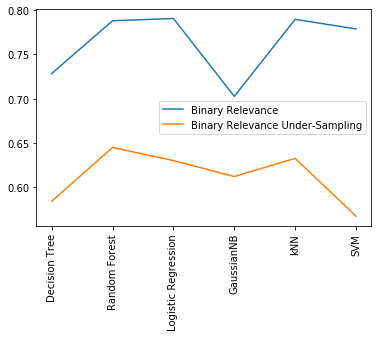

In [178]:
plt.plot(list(br_clf_accuracies.keys()), list(br_clf_accuracies.values()))
plt.plot(list(br_clfus_accuracies.keys()), list(br_clfus_accuracies.values()))
plt.xticks(rotation=90)
plt.legend(['Binary Relevance','Binary Relevance Under-Sampling'])

### Plot the F-1 Scores

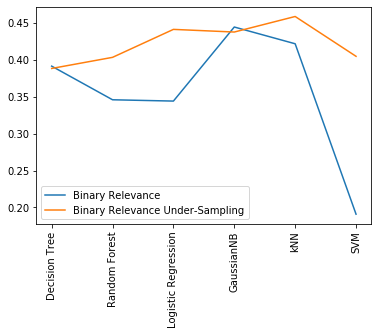

In [179]:
plt.plot(list(br_clf_f1.keys()), list(br_clf_f1.values()))
plt.plot(list(br_clfus_f1.keys()), list(br_clfus_f1.values()))
plt.xticks(rotation=90)
plt.legend(['Binary Relevance','Binary Relevance Under-Sampling'])

## Task 4: Implement the Classifier Chains Algorithm

In [180]:
class ClassifierChains(BaseEstimator, ClassifierMixin):
    def __init__(self, base_classifier=LogisticRegression(max_iter=20000), order=None):
        self.base_classifier=base_classifier
        self.order = order

    def fit(self, X, y):
        """
        Build a Classifier Chain from the training set (X, y).
        Parameters
        ----------
        X : array-like or sparse matrix, shape = [n_samples, n_features]
            The training input samples. Internally, it will be converted to
            ``dtype=np.float32`` and if a sparse matrix is provided
            to a sparse ``csc_matrix``.
        y : array-like, shape = [n_samples, n_labels] 
            The target values (class labels) as integers or strings.

        """
        
        # check the order parameter
        if self.order is None:
            # default value - natural order for number of labels
            self.order = list(range(y.shape[1]))
        elif self.order == 'random':
            # random order
            self.order = list(range(y.shape[1]))
            random.shuffle(self.order)
        else:
            # order specified
            if(len(self.order)==y.shape[1]):
                # expect order from 1, hence reduce 1 to consider zero indexing
                self.order = [o - 1 for o in self.order]
    
        
        # list of base models for each class
        self.models = [clone(self.base_classifier) for clf in range(y.shape[1])]

        # create a copy of X
        X_joined = X.copy()
       # X_joined.reset_index(drop=True, inplace=True)
        
        # create a new dataframe with X and y-in the order specified
        # if order = [2,4,5,6...] -> X_joined= X, y2, y4, y5...
        for val in self.order:
            X_joined = pd.concat([X_joined, y['Class'+str(val+1)]], axis=1)

        
        # for each ith model, fit the model on X + y0 to yi-1 (in the order specified)
        # if order = [2,4,6,....] fit 1st model on X for y2, fit second model on X+y2 for y4...
        for chain_index, model in enumerate(self.models):
            # select values of the class in order
            y_vals = y.loc[:, 'Class'+str(self.order[chain_index]+1)]
            # pick values for training - X+y upto the current label
            t_X = X_joined.iloc[:, :(X.shape[1]+chain_index)]
            check_X_y(t_X, y_vals)
            # fit the model
            model.fit(t_X, y_vals)


            
    # The predict function to make a set of predictions for a set of query instances
    def predict(self, X):
        
        # check if the models list has been set up
        check_is_fitted(self, ['models'])
        
        # dataframe to maintain previous predictions
        pred_chain = pd.DataFrame(columns=['Class'+str(o+1) for o in self.order])
        
        X_copy = X.copy()
        X_joined = X.copy()
        
        # use default indexing
        X_joined.reset_index(drop=True, inplace=True)
        X_copy.reset_index(drop=True, inplace=True)

        i=0
        
        # for each ith model, predict based on X + predictions of all models upto i-1
        # happens in the specified order since models are already fitted according to the order
        for chain_index, model in enumerate(self.models):
            # select previous predictions - all columns upto the current index
            prev_preds = pred_chain.iloc[:, :chain_index]
            # join the previous predictions with X
            X_joined = pd.concat([X_copy, prev_preds], axis=1)
            # predict on the base model
            pred = model.predict(X_joined)
            # add the new prediction to the pred chain
            pred_chain['Class'+str(self.order[i]+1)] = pred
            i+=1

        # re-arrange the columns in natural order to return the predictions
        pred_chain = pred_chain.loc[:, ['Class'+str(j+1) for j in range(0, len(self.order))]]
        # all sklearn implementations return numpy array
        # hence convert the dataframe to numpy array
        return pred_chain.to_numpy()
    
    
    
    # Function to predict probabilities of 1s
    def predict_proba(self, X):
        # check if the models list has been set up
        check_is_fitted(self, ['models'])
        
        # dataframe to maintain previous predictions
        pred_chain = pd.DataFrame(columns=['Class'+str(o+1) for o in self.order])
        # dataframe to maintain probabilities of class labels
        pred_probs = pd.DataFrame(columns=['Class'+str(o+1) for o in self.order])
        X_copy = X.copy()
        X_joined = X.copy()
        
        # use default indexing
        X_joined.reset_index(drop=True, inplace=True)
        X_copy.reset_index(drop=True, inplace=True)

        i=0
        
        # for each ith model, predict based on X + predictions of all models upto i-1
        # happens in the specified order since models are already fitted according to the order
        for chain_index, model in enumerate(self.models):
            
            # select previous predictions - all columns upto the current index
            prev_preds = pred_chain.iloc[:, :chain_index]
            # join the previous predictions with X
            X_joined = pd.concat([X_copy, prev_preds], axis=1)
            # predict on the base model
            pred = model.predict(X_joined)
            # predict probabilities
            pred_proba = model.predict_proba(X_joined)
            # add the new prediction to the pred chain
            pred_chain['Class'+str(self.order[i]+1)] = pred
            # save the probabilities of 1 according to label order
            pred_probs['Class'+str(self.order[i]+1)] = [one_prob[1] for one_prob in pred_proba]
            i+=1

        # re-arrange the columns in natural order to return the probabilities
        pred_probs = pred_probs.loc[:, ['Class'+str(j+1) for j in range(0, len(self.order))]]
        # all sklearn implementations return numpy array
        # hence convert the dataframe to numpy array
        return pred_probs.to_numpy()

### Predictions against the Test data

In [181]:
cc = ClassifierChains(order=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
# fit
cc.fit(X_train, y_train)

In [182]:
# predict
cc_pred = cc.predict(X_test)

### Calculate the Accuracy

In [183]:
print("Accuracy of Classifier Chains: " + str(accuracy_score(y_test, cc_pred)))

Accuracy of Classifier Chains: 0.78424


### Experiment with different Base Classifiers - GridSearch

In [184]:
cv_folds=5

# generate 20 random orders for class labels 
rand_orders = [list(range(1, y_test.shape[1]+1)) for i in list(range(1, 20))]

for lst in rand_orders:
    random.shuffle(lst)

# make sure natural order is present
rand_orders.append([1,2,3,4,5,6,7,8,9,10,11,12,13,14])

# Set up the parameter grid to search
param_grid ={'base_classifier': [DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2),
                                 RandomForestClassifier(criterion='entropy'),
                                 LogisticRegression(max_iter=20000), GaussianNB(), KNeighborsClassifier(), SVC()],
            'order': rand_orders}

# Perform the search
tuned_model = GridSearchCV(ClassifierChains(), \
                            param_grid, scoring=make_scorer(accuracy_score), verbose = 2, n_jobs = -1, cv=cv_folds)
tuned_model.fit(X_train, y_train)

# Print details
print("Best Parameters Found: ")
display(tuned_model.best_params_)
display(tuned_model.best_score_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  9.7min finished


Best Parameters Found: 


{'base_classifier': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=20000,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 'order': [11, 4, 10, 1, 9, 5, 3, 12, 6, 8, 2, 7, 13, 14]}

0.7951338024837374

In [197]:
# store the best parameters
best = tuned_model.best_params_

### Evaluate the best model against the Test Data

In [198]:
cc = ClassifierChains(base_classifier=best['base_classifier'], order=best['order'])
cc.fit(X_train, y_train)

In [199]:
cc_pred = cc.predict(X_test)

In [200]:
print("Accuracy of Classifier Chains - Best Model: " + str(accuracy_score(y_test, cc_pred)))

Accuracy of Classifier Chains - Best Model: 0.78847


## Task 5: Evaluate the Performance of the Classifier Chains Algorithm

### Accuracy and F1 Scores of Classifier Chains

In [204]:
# list of base models
base_models = [DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2),
               RandomForestClassifier(criterion='entropy'),
               LogisticRegression(max_iter=20000), GaussianNB(), KNeighborsClassifier(), SVC()]
base_model_names = ["Decision Tree", "Random Forest", "Logistic Regression", "GaussianNB", "kNN", "SVM"]

cc_accuracies = dict()
cc_f1 = dict()

i=0
for clf in base_models:
    cc = ClassifierChains(clf, order=best['order'])
    cc.fit(X_train, y_train)
    cc_pred = cc.predict(X_test)
    # accuracy score
    accuracy = accuracy_score(y_test, cc_pred)
    cc_accuracies[base_model_names[i]] = accuracy
    # F1 score
    cc_f1_score = metrics.f1_score(y_test, pd.DataFrame(cc_pred), average='macro')
    cc_f1[base_model_names[i]] = cc_f1_score
    i+=1

print("====================Classifier Chains Accuracy====================")
display(cc_accuracies)
print("===================Classifier Chains F1 Scores====================")
display(cc_f1)

====================Classifier Chains Accuracy====================


{'Decision Tree': 0.72137,
 'Random Forest': 0.79113,
 'Logistic Regression': 0.78847,
 'GaussianNB': 0.68939,
 'kNN': 0.78394,
 'SVM': 0.77588}

===================Classifier Chains F1 Scores====================


{'Decision Tree': 0.38906778855908924,
 'Random Forest': 0.3609104334374137,
 'Logistic Regression': 0.3846810487809151,
 'GaussianNB': 0.43195691283452253,
 'kNN': 0.4175588720744822,
 'SVM': 0.23331639887751227}

### Comparison with Binary Relevance Approaches

#### Accuracy Scores

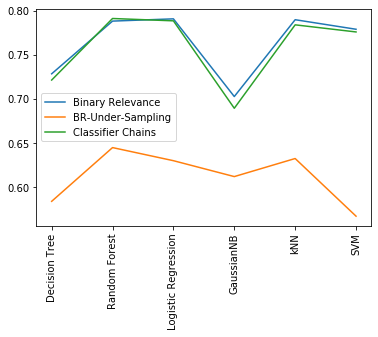

In [205]:
plt.plot(list(br_clf_accuracies.keys()), list(br_clf_accuracies.values()))
plt.plot(list(br_clfus_accuracies.keys()), list(br_clfus_accuracies.values()))
plt.plot(list(cc_accuracies.keys()), list(cc_accuracies.values()))
plt.xticks(rotation=90)
plt.legend(['Binary Relevance','BR-Under-Sampling', 'Classifier Chains'])

#### F1 Scores

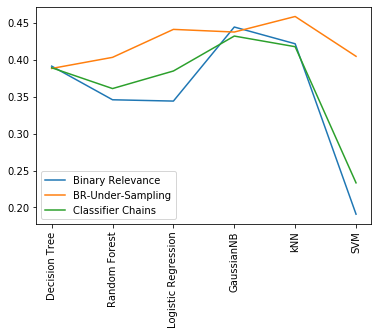

In [206]:
plt.plot(list(br_clf_f1.keys()), list(br_clf_f1.values()))
plt.plot(list(br_clfus_f1.keys()), list(br_clfus_f1.values()))
plt.plot(list(cc_f1.keys()), list(cc_f1.values()))
plt.xticks(rotation=90)
plt.legend(['Binary Relevance','BR-Under-Sampling', 'Classifier Chains'])

## Task 6: Reflect on the Performance of the Different Models Evaluated

Consider **BR=Binary Relevance Classifier, BRUS=Binary Relevance Classifier with Under Sampling, CC=Classifier Chains.**

**From the above experiment we can conclude that:**

* BR works much better than BRUS. This is because with undersampling, relevant training samples may be lost which affect the accuracy.
* BRUS gives better F1 scores for all the base models as compared to BR. Lower F1 score is an indication that the data is highly biased which means high precision and low recall. So when the data gets more balanced after undersampling, we achieve better F1 scores.
* CC works better than BR and BRUS because it takes label dependency into consideration while making predictions. BR on the other hand fits and predicts independently of other labels. To my surprise, in this experiment we can obseve that CC outperforms BR only in case of RandomForest as the base model. 
* The performance of CC depends on the label order as while making current predictions, we consider the results and labels of previous predictions. To experiment with label ordering, random 20 label orders were used in grid search. To my observation, the results accross different runs are inconsistent pertaining to label orders.(refer the above plots)
* In terms of complexity, BR is simple and faster as compared to CC. In terms of performance, CC has better performance than BR due to reasons mentioned above.
* While dealing with Yeast Dataset, CC works slightly better than BR which is a surprise. So, while dealing with Yeast Dataset, we can use BR as an adequate model if complexity and speed is a concern.

# References:

[1] Read, J., Pfahringer, B., Holmes, G. and Frank, E. (2011). Classifier chains for multi-label classification. Machine Learning, [online] 85(3), pp.333-359. Available at: https://link.springer.com/content/pdf/10.1007/s10994-011-5256-5.pdf.

[2] A Literature Survey on Algorithms for Multi-label Learning by Mohammad S Sorower. Available at: https://pdfs.semanticscholar.org/6b56/91db1e3a79af5e3c136d2dd322016a687a0b.pdf